In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
folder = r'C:\DeepRESTORE\llm_brain_representations\Trained'

In [3]:
folders = os.listdir(folder)
folders

['01', '02', '03', '04', '05', '06', '07', '08', '09']

In [4]:
def get_data(folder):
    files = os.listdir(folder)
    r2 = []
    pcc = []
    for file in files:
        path = Path(folder, file)
        data = np.load(path)
        r2.append(data[2])
        pcc.append(data[3])

    return r2, pcc

In [5]:
for subject in folders:
    dir = Path(folder, subject, 'Mapping')
    gpt_dir = Path(dir, 'ElasticNet_ChatGPT')
    fastText_dir = Path(dir, 'ElasticNet_FastText')
    wave2vec_dir = Path(dir, 'ElasticNet_Wav2Vec')
    pcc = get_data(wave2vec_dir)
    print(subject, round(np.mean(pcc),2), round(np.std(pcc), 2))

01 0.82 0.33
02 0.96 0.02
03 0.86 0.16
04 0.99 0.02
05 0.74 0.49
06 0.93 0.04
07 0.42 1.38
08 0.92 0.06
09 0.25 1.43


In [6]:
subjects, r2s_gpt, pccs_gpt =[], [], []
gpt_pccs_mean, gpt_pccs_std = [], []
fastText_pccs_mean, fastText_pccs_std = [], []
Wave_pccs_mean, Wave_pccs_std = [], []
r2s_fastText, pccs_fastText =[], []
r2s_Wav, pccs_Wav =[], []
for subject in folders:
    dir = Path(folder, subject, 'Mapping')
    gpt_dir = Path(dir, 'ElasticNet_ChatGPT')
    fastText_dir = Path(dir, 'ElasticNet_FastText')
    wave2vec_dir = Path(dir, 'ElasticNet_Wav2Vec')

    r2, pcc = get_data(gpt_dir)
    subjects.append(subject)
    r2s_gpt.append(r2)
    pccs_gpt.append(pcc)
    gpt_pccs_mean.append(np.mean(r2))
    gpt_pccs_std.append(np.std(r2))


    r2, pcc = get_data(fastText_dir)
    r2s_fastText.append(r2)
    pccs_fastText.append(pcc)
    fastText_pccs_mean.append(np.mean(pcc))
    fastText_pccs_std.append(np.std(pcc))


    r2, pcc = get_data(wave2vec_dir)
    r2s_Wav.append(r2)
    pccs_Wav.append(pcc)
    Wave_pccs_mean.append(np.mean(pcc))
    Wave_pccs_mean.append(np.std(pcc))




In [7]:
subject, gpt_pcc, fastText_pcc, Wave2Vec_pcc, gpt_pcc_std, fastText_pcc_std, Wave2Vec_pcc_std = [], [], [], [], [], [], []

for index in range(9):
    subject.append(index+1)
    gpt_pcc.append(np.mean(pccs_gpt))
    fastText_pcc.append(np.mean(pccs_fastText))
    Wave2Vec_pcc.append(np.mean(pccs_Wav))
    gpt_pcc_std.append(np.std(pccs_gpt))
    fastText_pcc_std.append(np.std(pccs_fastText))
    Wave2Vec_pcc_std.append(np.std(pccs_Wav))

In [8]:
columns=['subject', 'gpt_pcc', 'fastText_pcc', 'Wave2Vec_pcc', 'gpt_pcc_std', 'fastText_pcc_std', 'Wave2Vec_pcc_std']
data = np.array([subject, gpt_pcc, fastText_pcc, Wave2Vec_pcc, gpt_pcc_std, fastText_pcc_std, Wave2Vec_pcc_std])

data = pd.DataFrame(data.T, columns=columns)




In [9]:
data

,subject,gpt_pcc,fastText_pcc,Wave2Vec_pcc,gpt_pcc_std,fastText_pcc_std,Wave2Vec_pcc_std
0,1.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
1,2.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
2,3.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
3,4.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
4,5.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
5,6.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
6,7.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
7,8.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404
8,9.0,0.950204,0.950965,0.916709,0.056165,0.054565,0.133404


In [12]:
len(subjects), len(r2s_fastText[0])

(9, 100)

In [13]:
def count_trials_by_r2_range(r2_values):
    bins = np.arange(0, 1.1, 0.1)
    counts, _ = np.histogram(r2_values, bins=bins)
    r2_ranges = {f"{bins[i]:.1f} - {bins[i+1]:.1f}": counts[i] for i in range(len(counts))}
    
    return r2_ranges

In [14]:
r2_ranges_gpt_all = []
r2_ranges_fastText_all = []
r2_ranges_Wav_all = []
for subject in range(9):
    r2_ranges_gpt = count_trials_by_r2_range(r2s_gpt[subject])
    r2_ranges_fastText = count_trials_by_r2_range(r2s_fastText[subject])
    r2_ranges_Wav2Vec = count_trials_by_r2_range(r2s_Wav[subject])
    r2_ranges_gpt_all.append(r2_ranges_gpt)
    r2_ranges_fastText_all.append(r2_ranges_fastText)
    r2_ranges_Wav_all.append(r2_ranges_Wav2Vec)

In [15]:
def calculate_mean_across_ranges(data):
    means = []
    range_keys = list(data[0].keys())
    for key in range_keys:
        trials_for_range = [subject[key] for subject in data]
        mean_for_range = int(np.mean(trials_for_range))
        means.append(mean_for_range)
    return means, range_keys

In [16]:
gpt, keys = calculate_mean_across_ranges(r2_ranges_gpt_all)
fastText, _ = calculate_mean_across_ranges(r2_ranges_fastText_all)
Wave, _ = calculate_mean_across_ranges(r2_ranges_Wav_all)

In [17]:
gpt, fastText, Wave

([0, 1, 0, 1, 1, 2, 3, 8, 24, 52],
 [0, 1, 0, 1, 2, 1, 3, 7, 24, 53],
 [0, 1, 1, 1, 2, 4, 4, 10, 21, 43])

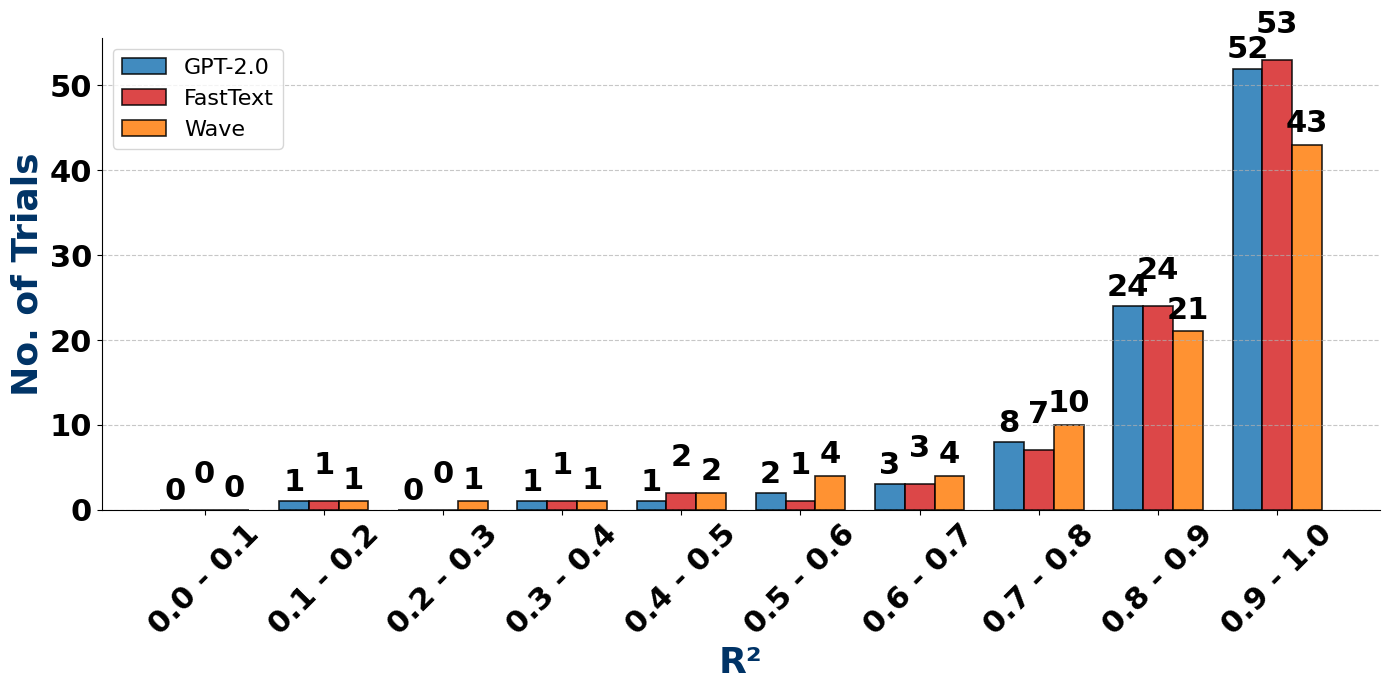

In [24]:
import numpy as np
import matplotlib.pyplot as plt

width = 0.25  # Width of each bar

# Set positions for each set of bars
x = np.arange(len(keys))  # Positions of groups on x-axis
gpt_positions = x - width
fastText_positions = x
Wave_positions = x + width

# Create figure
plt.figure(figsize=(14, 7))

# Plot each group
bars_gpt = plt.bar(gpt_positions, gpt, width=width, label='GPT-2.0', alpha=0.85, color='#1f77b4', edgecolor='black', linewidth=1.2)
bars_fastText = plt.bar(fastText_positions, fastText, width=width, label='FastText', alpha=0.85, color='#d62728', edgecolor='black', linewidth=1.2)
bars_Wave = plt.bar(Wave_positions, Wave, width=width, label='Wave', alpha=0.85, color='#ff7f0e', edgecolor='black', linewidth=1.2)

# Function to add value labels on top of bars
def add_value_labels(bars, space=0.5):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + space, f'{yval:.0f}',
                 ha='center', va='bottom', fontsize=22, fontweight='bold', color='black')

# Add labels
add_value_labels(bars_gpt)
add_value_labels(bars_fastText, 2.5)
add_value_labels(bars_Wave, 0.8)

# Format axes
plt.xlabel('R²', fontsize=26, fontweight='bold', color='#003366')
plt.ylabel('No. of Trials', fontsize=26, fontweight='bold', color='#003366')
plt.xticks(x, keys, rotation=45, fontsize=22, fontweight='bold', color='black')
plt.yticks(fontsize=22, fontweight='bold', color='black')

# Aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Layout and save
plt.tight_layout()
plt.savefig(r'C:\DeepRESTORE\llm_brain_representations\data\embeddings\comp.pdf', dpi=800, format='pdf', bbox_inches="tight")
plt.show()


In [83]:
print('R2_score_range',keys)
print('GPT-2.0', gpt)
print('fastText', fastText)
print('Wave2Vec-2.0', Wave)

R2_score_range ['0.0 - 0.1', '0.1 - 0.2', '0.2 - 0.3', '0.3 - 0.4', '0.4 - 0.5', '0.5 - 0.6', '0.6 - 0.7', '0.7 - 0.8', '0.8 - 0.9', '0.9 - 1.0']
GPT-2.0 [0, 1, 0, 1, 1, 2, 3, 8, 24, 52]
fastText [0, 1, 0, 1, 2, 1, 3, 7, 24, 53]
Wave2Vec-2.0 [0, 1, 1, 1, 2, 4, 4, 10, 21, 43]


In [84]:
pccs_gpt

[[0.9671020207621265,
  0.9575392537082049,
  0.983295843280334,
  0.9791005018996914,
  0.9258132513247201,
  0.9857097325275239,
  0.9838163167616704,
  0.989196098024083,
  0.9860473191328124,
  0.9661846201923938,
  0.9770995641263011,
  0.9693915722001384,
  0.983141865453434,
  0.9850869984821576,
  0.9736279282362424,
  0.9815095507730236,
  0.9548811957577924,
  0.9528597511831342,
  0.947698660689063,
  0.9795536152879875,
  0.9653526752910773,
  0.9639880127296215,
  0.9558405558107319,
  0.9690531948111758,
  0.9683298062294616,
  0.9622596980529,
  0.9697492271860233,
  0.9709283783915748,
  0.8969597195372749,
  0.9298734972991786,
  0.9816512420938609,
  0.9707723713732372,
  0.8986801270756545,
  0.9749034270525262,
  0.9760549136176065,
  0.9407233498052785,
  0.9783814468177566,
  0.9597739043898336,
  0.8195353383995155,
  0.9752546594520272,
  0.9746511869304854,
  0.9797167591463138,
  0.9057422217625538,
  0.9490768823718898,
  0.9460069443976166,
  0.9526092989375